Objective 1: Data Preparation & QA
- Import and read in the AirBnB listing data
- Cast any date column as a datetime format
- Filter down the data to just listings in the city of Paris
- QA the Paris listings data: check for missing value and calculate the minimum, maximum, and average for each numeric field

In [15]:
import pandas as pd

listings = pd.read_csv(
    "Listings.csv", 
    encoding="ISO-8859-1", 
    low_memory=False,
    parse_dates=["host_since"]
)

In [3]:
listings.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [7]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279537 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

In [11]:
listings["host_since"] = pd.to_datetime(listings["host_since"])

listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  int64         
 1   name                         279537 non-null  object        
 2   host_id                      279712 non-null  int64         
 3   host_since                   279547 non-null  datetime64[ns]
 4   host_location                278872 non-null  object        
 5   host_response_time           150930 non-null  object        
 6   host_response_rate           150930 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279547 non-null  object        
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  object        
 11  host_identity_verified    

In [28]:
paris_listings = (listings.query("city == 'Paris'").loc[:, ["host_since", "neighbourhood", "city","accommodates","price"]])

paris_listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


In [30]:
paris_listings.isna().sum()

host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

In [32]:
paris_listings.describe()

,host_since,accommodates,price
count,64657,64690.000000,64690.000000
mean,2015-11-01 11:06:05.528867584,3.037997,113.096445
min,2008-08-30 00:00:00,0.000000,0.000000
25%,2014-03-09 00:00:00,2.000000,59.000000
50%,2015-07-07 00:00:00,2.000000,80.000000
75%,2017-05-29 00:00:00,4.000000,120.000000
max,2021-02-07 00:00:00,16.000000,12000.000000
std,NaN,1.588766,214.433668


In [34]:
paris_listings.query("accommodates == 0 and price == 0").count()

host_since       54
neighbourhood    54
city             54
accommodates     54
price            54
dtype: int64

Objective 2: Prepare for Visualization
- Create a DataFrame called paris_listings_neighbourhood. Group the Paris listings by neighbourhood and calculate the average price for each. Sort by price in ascending order
- Create a DataFrame called paris_listings_accommodations. Filter your data down to the most expensive neighbourhood in Paris. Group it by accommodations column, and contain the mean price for each value of accommodates sorted from lowest to highest average price
- Create a DataFrame called paris_listings_over_time. Group the data by year component of host_since. Calculate a count of rows to get the number of new hosts for each year, and the average price of listings for each year

In [40]:
paris_listings_neighbourhood = (
    paris_listings
    .groupby("neighbourhood")
    .agg({"price":"mean"})
    .sort_values("price")
)

paris_listings_neighbourhood.tail()

,price
neighbourhood,
Luxembourg,155.638639
Palais-Bourbon,156.856578
Passy,161.144635
Louvre,175.379972
Elysee,210.536765


In [50]:
paris_listings_accommodations = (
    paris_listings
    .query("neighbourhood == 'Elysee'")
    .groupby("accommodates")
    .agg({"price":"mean", "neighbourhood":"count"})
    .sort_values("price")
)

paris_listings_accommodations.head()

,price,neighbourhood
accommodates,,
0,0.000000,6
1,79.522222,90
3,152.828767,146
2,155.103352,716
4,212.096070,458


In [54]:
paris_listings_over_time = (
    paris_listings
    .set_index("host_since")
    .resample("YE")
    .agg({
        "price":"mean",
        "neighbourhood":"count"
    })
)

paris_listings_over_time.head()

,price,neighbourhood
host_since,,
2008-12-31,77.750000,4
2009-12-31,159.641509,106
2010-12-31,125.031250,416
2011-12-31,124.828230,1339
2012-12-31,111.578615,4592


Objective 3: Visualize the Data
- Build a horizontal bar chart of average rent price by neighbourhood. Which neighbourhood stand out?
- Build a horizontal bar chart of average price by accommodates in the most expensive neighbourhood. Are the result intuitive?
- Finally, build line charts of new hosts per year and average price by year. What happened to new host in 2015? Was average price impacted?
- Challenge: Plot both time series in a dual axis line chart

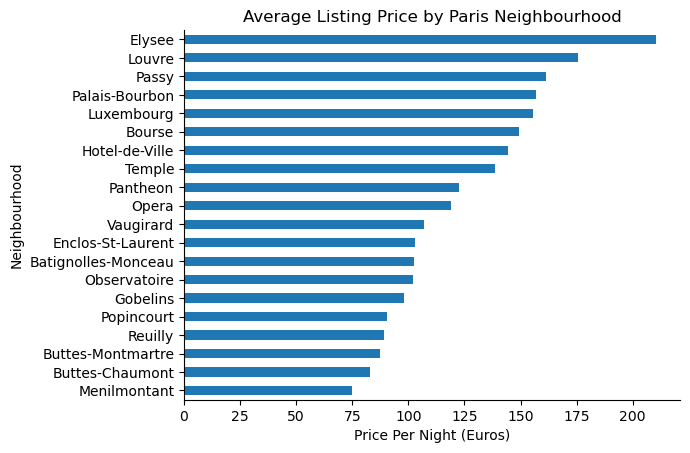

In [57]:
import seaborn as sns

(paris_listings_neighbourhood
 .plot
 .barh(
     title = "Average Listing Price by Paris Neighbourhood",
     xlabel = "Price Per Night (Euros)",
     ylabel = "Neighbourhood",
     legend = None
 )
)

sns.despine()

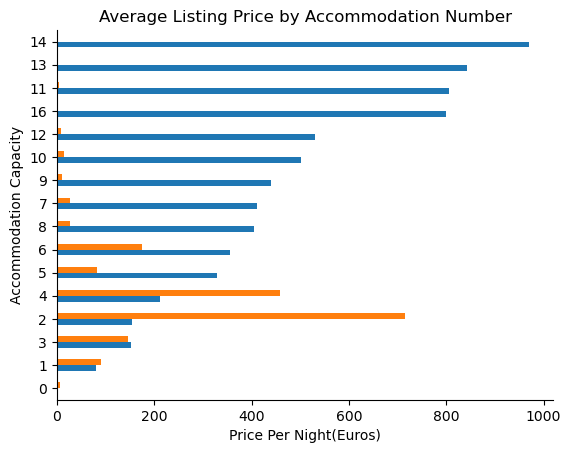

In [65]:
(paris_listings_accommodations
 .plot
 .barh(
     title = "Average Listing Price by Accommodation Number",
     xlabel = "Price Per Night(Euros)",
     ylabel = "Accommodation Capacity",
     legend = None
 )
)

sns.despine()

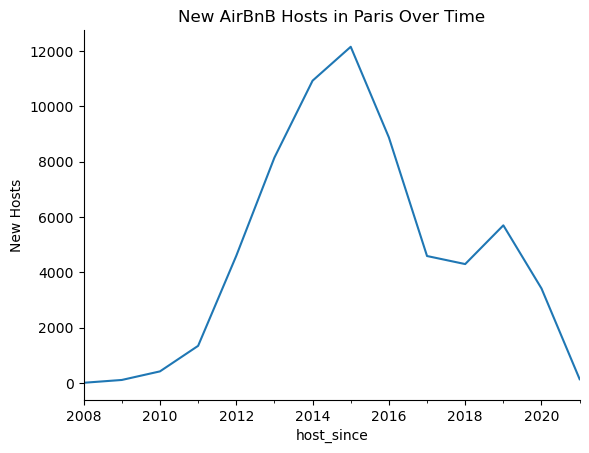

In [67]:
paris_listings_over_time["neighbourhood"].plot(
    ylabel = "New Hosts",
    title = "New AirBnB Hosts in Paris Over Time"
)

sns.despine()

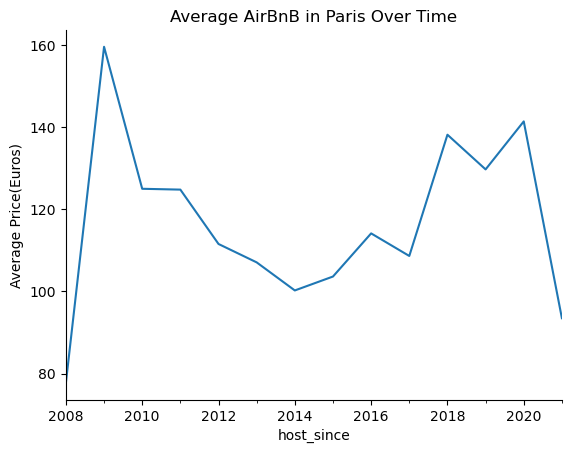

In [73]:
paris_listings_over_time["price"].plot(
    ylabel = "Average Price(Euros)",
    title = "Average AirBnB in Paris Over Time"
)

sns.despine()

Text(0.5, 1.0, '2015 Regulations Lead to Fewer New Hosts, Higher Prices')

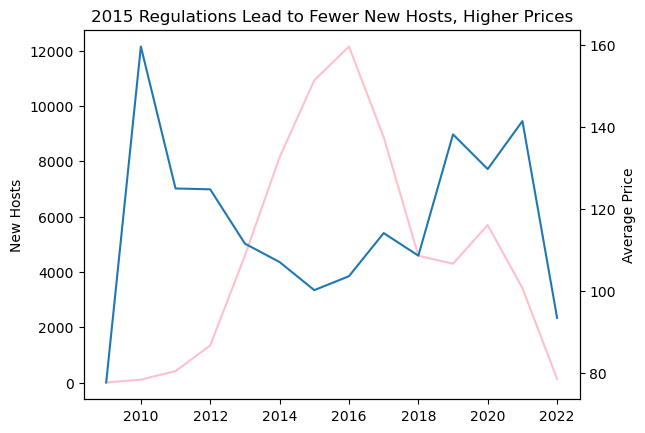

In [79]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(
    paris_listings_over_time.index,
    paris_listings_over_time["neighbourhood"],
    label = "New Hosts",
    c = "pink"
)

ax.set_ylabel("New Hosts")

ax2 = ax.twinx()

ax2.plot(
    paris_listings_over_time.index,
    paris_listings_over_time["price"],
    label = "Average Price",
)

ax2.set_ylabel("Average Price")

ax.set_title("2015 Regulations Lead to Fewer New Hosts, Higher Prices")